## **#06: Regression and Predictive Analysis**
- Instructor: [Jaeung Sim](https://jaeungs.github.io/) (University of Connecticut)
- Course: OPIM 5512 Data Science Using Python
- Last updated: February 20, 2025

**Objectives**
1. Explore and transform variables for statistical models.
1. Implement basic and advanced regression methods using `sklearn` and `statsmodels` libraries.
1. Divide a dataset into train and test sets, and then interpret their evaluation statistics.
1. Compare the predictive outcomes of different regression methods using `sklearn` and `statsmodels` libraries.

**References**
* [Official Statistics: BEIS Public Attitudes Tracker: Spring 2022](https://www.gov.uk/government/statistics/beis-public-attitudes-tracker-spring-2022)
* [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Confusion Matrix (Wikipedia)](https://en.wikipedia.org/wiki/Confusion_matrix)
* [What is a confusion matrix?](https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5)
* [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


##### **Part 0. Basic Setup**

**0.1. Setting up your notebook and loading basic libraries**

In [1]:
# Set your Google Drive directory
import os
os.getcwd()

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Colab Notebooks/OPIM 5512 (Spring 2025)') # You may need to change this directory

Mounted at /content/drive


In [2]:
# Run this code to import the NumPy, Pandas, Matplotlib, and Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**0.2. Exploring the dataset**

We will use **BEIS Public Attitudes Tracker** for Spring 2022 published by the UK government's Department for Business, Energy & Industrial Strategy (BEIS). It is a quarterly survey collecting data on public awareness, behaviors and attitudes relating to BEIS's policy areas.

You can refer to the following URL for more details:
* https://www.gov.uk/government/statistics/beis-public-attitudes-tracker-spring-2022

In this dataset, you will find responses from 4,381 randomly sampled individuals in the UK.

For this hands-on exercise, you need to download `data_lecture04.xlsx` file from HuskyCT. This file consists of the following sheets:
- Labels: Survey responses are recorded as item sentences.
- Values: Responses are coded as numbers.
- Variable Labels: Connects the variable names and their original questionnaire.
- Variable Values: Connects Labels and Values.

In [3]:
# Load a dataset from an MS Excel sheet
df = pd.read_excel('dataset_notebook_06.xlsx', sheet_name="Values")
df.head(10)

,NEW_HH_SERIAL,NEW_INDV_SERIAL,CLIMCONCERN,NZKNOW,RENEWSUPPORT,RENEW2SUPPORTA,RENEW2SUPPORTB,RENEW2SUPPORTC,RENEW2SUPPORTD,RENEW2SUPPORTE,...,WINDFARM_NET,SOLARFARM_NET,SOLARHOME_NET,PAYBILLEN_NET,SATISENERGA_NET,SATISENERGB_NET,SATISENERGC_NET,CAWI_PAPI,finalweight,finalhhweight
0,100034,1000341,1,4,2,4,3,3,3,2,...,1.0,1.0,1.0,2,1,1,1,1,0.698305,0.720129
1,100034,1000342,2,1,3,2,2,2,2,2,...,1.0,1.0,1.0,1,1,1,1,1,2.050606,2.114694
2,100303,1003031,1,4,1,1,1,1,1,1,...,1.0,1.0,1.0,1,2,2,1,1,1.039688,0.824083
3,100332,1003321,2,3,3,2,3,1,1,1,...,3.0,3.0,1.0,1,1,1,1,1,0.805920,0.453667
4,100332,1003322,3,4,3,3,3,3,3,3,...,3.0,3.0,2.0,1,1,1,1,1,0.965502,0.543499
5,100332,1003323,2,2,1,2,2,2,2,2,...,1.0,1.0,3.0,3,3,3,3,1,3.480858,1.959438
6,100943,1009431,1,4,1,1,1,1,1,1,...,1.0,1.0,1.0,2,1,1,1,1,0.598204,0.537066
7,101369,1013691,3,3,3,3,3,3,3,2,...,1.0,3.0,3.0,1,3,3,3,1,1.075744,1.930266
8,101518,1015181,2,4,1,1,3,1,2,1,...,1.0,1.0,3.0,2,1,1,1,1,0.456048,0.946974
9,101518,1015182,2,3,2,2,2,2,2,2,...,1.0,1.0,1.0,2,1,1,1,1,0.323759,0.672279


**0.3. Processing the dataset**

We find that there are 165 unique columns. To focus on understanding and implementing regression models, we will focus on a few variables. Because the variable values do not necessarily indicate either magnitudes or categories, we should carefully transform our covariates to incorporate missing values, non-quantifiable values, and so on.

We will focus on the following variables:

* NEW_INDV_SERIAL (ID)
>**Variable label:** New individual serial

* RENEWSUPPORT (dependent var.)
>**Variable label:** "Do you support or oppose the use of renewable energy for providing our electricity, fuel and heat?"
>
>**Variable value:**
>* 1: Never heard of this
>* 2: Hardly anything but I've heard of this
>* 3: A little
>* 4: A fair amount
>* 5: A lot
>* -4 (missing value): Not answered (Paper)

* RENEWSUPPORT_NET (dependent var.)
>**Variable label:** Whether support or oppose the use of renewable energy (derived from `RENEWSUPPORT`)
>* 1: Total support
>* 2: Neither support nor oppose
>* 3: Total oppose
>* 4: Don't know

* MOSTWORRY (dependent var.)
>**Variable label:** "Which ONE of the following bills or expenses are you most worried about?"
>
>**Variable value:**
>* 1: Energy bills (gas/electricity)
>* 2: Food and other household essentials
>* 3: Transport, including petrol/diesel and public transport costs
>* 4: Not applicable – not worried about any of them
>* 5: Not applicable – same level of worry for all of them
>* 6: Not applicable/Don't know
>* 7: Prefer not to say
>* -4 (missing value): Not answered (Paper)
>* -5 (missing value): Multiple options chosen (Paper)

* CLIMCONCERN_NET (independent var.)
>**Variable label:** Level of concern about climate change (drived from `CLIMCONCERN`)
>
>**Variable value:**
>* 1: Total concerned
>* 2: Total not concerned
>* 3: Don't know

* NZKNOW_NET (independent var.)
>**Variable label:** Level of awareness of Net Zero (drived from `NZKNOW`)
>
>**Variable value:**
>* 1: Never heard of this
>* 2: Knew hardly anything/Knew a little
>* 3: Knew a fair amount/Knew a lot

* INTERNET (independent var.)
>**Variable label:** "How often do you use the internet?"
>
>**Variable value:**
>* 1: Almost all the time
>* 2: Many times a day
>* 3: About once a day
>* 4: Several times a week
>* 5: Less often
>* 6: Never
>* -4 (missing): Not answered (Paper)  

* AGEBAND (independent var.)
>**Variable label:** "Which of the following age bands are you in?"
>
>**Variable value:**
>* 1: 16 to 19
>* 2: 20 to 24
>* 3: 25 to 34
>* 4: 35 to 44
>* 5: 45 to 54
>* 6: 55 to 64
>* 7: 65 to 74
>* 8: 74 or over
>* 9: Prefer not to say  


In [4]:
# Choose a few variables we want to focus on
df_subset = df[["NEW_INDV_SERIAL","RENEWSUPPORT","RENEWSUPPORT_NET","MOSTWORRY","CLIMCONCERN_NET","NZKNOW_NET","INTERNET","AGEBAND"]]
df_subset.head(10)

,NEW_INDV_SERIAL,RENEWSUPPORT,RENEWSUPPORT_NET,MOSTWORRY,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND
0,1000341,2,1.0,3,1.0,3.0,2.0,5.0
1,1000342,3,2.0,1,1.0,1.0,2.0,4.0
2,1003031,1,1.0,1,1.0,3.0,1.0,3.0
3,1003321,3,2.0,1,1.0,2.0,1.0,7.0
4,1003322,3,2.0,3,2.0,3.0,2.0,7.0
5,1003323,1,1.0,3,1.0,2.0,1.0,2.0
6,1009431,1,1.0,5,1.0,3.0,4.0,7.0
7,1013691,3,2.0,1,2.0,2.0,1.0,4.0
8,1015181,1,1.0,4,1.0,3.0,2.0,7.0
9,1015182,2,1.0,1,1.0,2.0,2.0,6.0


We will create new variables to address the scale and missing value issues.

(1) Transform RENEWSUPPORT (Dependent var.)
* Issue: Remove missing values

In [5]:
# Explore unique values in the column
print(df_subset["RENEWSUPPORT"].unique()) # Replace 'unique' with 'max'/'min' to explore maximum/minimum values

[ 2  3  1  4  6  5 -4]


In [6]:
# Replace -4 with None
df_subset["RENEWSUPPORT"] = df_subset["RENEWSUPPORT"].replace([-4], None)
print(df_subset["RENEWSUPPORT"].unique())

[2 3 1 4 6 5 None]


<ipython-input-6-5e9bc299274a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["RENEWSUPPORT"] = df_subset["RENEWSUPPORT"].replace([-4], None)


(2) RENEWSUPPORT_NET (dependent var.)
* Issue: You may want to check whether or not an individual support renewables.
* You will create a binary variable indicating 1 if "Total support" (1), 0 otherwise.

In [7]:
# Explore unique values in the column
print(df_subset["RENEWSUPPORT_NET"].unique())

[ 1.  2.  3.  4. nan]


In [8]:
# Create a new dummy variable 'RENEWSUPPORT_BINARY'
df_subset["RENEWSUPPORT_BINARY"] = (df_subset["RENEWSUPPORT_NET"] == 1).astype(int)
print(df_subset["RENEWSUPPORT_BINARY"].unique())

[1 0]


<ipython-input-8-92e61fd895df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["RENEWSUPPORT_BINARY"] = (df_subset["RENEWSUPPORT_NET"] == 1).astype(int)


In [9]:
# Check the DataFrame
df_subset.head(10)

,NEW_INDV_SERIAL,RENEWSUPPORT,RENEWSUPPORT_NET,MOSTWORRY,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY
0,1000341,2,1.0,3,1.0,3.0,2.0,5.0,1
1,1000342,3,2.0,1,1.0,1.0,2.0,4.0,0
2,1003031,1,1.0,1,1.0,3.0,1.0,3.0,1
3,1003321,3,2.0,1,1.0,2.0,1.0,7.0,0
4,1003322,3,2.0,3,2.0,3.0,2.0,7.0,0
5,1003323,1,1.0,3,1.0,2.0,1.0,2.0,1
6,1009431,1,1.0,5,1.0,3.0,4.0,7.0,1
7,1013691,3,2.0,1,2.0,2.0,1.0,4.0,0
8,1015181,1,1.0,4,1.0,3.0,2.0,7.0,1
9,1015182,2,1.0,1,1.0,2.0,2.0,6.0,1


(3) Transform MOSTWORRY (dependent var.)
* Issue: Remove missing values

In [10]:
# Explore unique values in the column
print(df_subset["MOSTWORRY"].unique())

[ 3  1  5  4  2  6 -4  7 -5]


In [11]:
# Replace -4 and -5 with None
df_subset["MOSTWORRY"] = df_subset["MOSTWORRY"].replace([-4, -5], None)
print(df_subset["MOSTWORRY"].unique())

[3 1 5 4 2 6 None 7]


<ipython-input-11-54d55f6a2b39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["MOSTWORRY"] = df_subset["MOSTWORRY"].replace([-4, -5], None)


(4) CLIMCONCERN_NET (independent var.)
* Issue: (a) Values should be considered categorical in analysis, and (b) we want to consider the possibility that missing values include some systematic differences.
* For independent variables, you need to create dummy variables, each of which indicates 1 if an individual belongs to the certain category, 0 otherwise. Also, we will create a dummy variable indicating whether this column is `na` or not.

In [12]:
# Explore unique values in the column
print(df_subset["CLIMCONCERN_NET"].unique())

[ 1.  2.  3. nan]


In [13]:
# Create dummy variables
CLIMCONCERN_NET_dummies = pd.get_dummies(df_subset["CLIMCONCERN_NET"], prefix="CLIMCONCERN_NET")

# Concatenate 'df_subset' and 'MOSTWORRY_dummies'
df_subset = pd.concat([df_subset, CLIMCONCERN_NET_dummies], axis=1)

In [14]:
# Create a dummy variable for missing values
df_subset["CLIMCONCERN_NET_MISS"] = df_subset["CLIMCONCERN_NET"].isna().astype(int)

In [15]:
# Check the DataFrame
df_subset.head(10)

,NEW_INDV_SERIAL,RENEWSUPPORT,RENEWSUPPORT_NET,MOSTWORRY,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,CLIMCONCERN_NET_3.0,CLIMCONCERN_NET_MISS
0,1000341,2,1.0,3,1.0,3.0,2.0,5.0,1,True,False,False,0
1,1000342,3,2.0,1,1.0,1.0,2.0,4.0,0,True,False,False,0
2,1003031,1,1.0,1,1.0,3.0,1.0,3.0,1,True,False,False,0
3,1003321,3,2.0,1,1.0,2.0,1.0,7.0,0,True,False,False,0
4,1003322,3,2.0,3,2.0,3.0,2.0,7.0,0,False,True,False,0
5,1003323,1,1.0,3,1.0,2.0,1.0,2.0,1,True,False,False,0
6,1009431,1,1.0,5,1.0,3.0,4.0,7.0,1,True,False,False,0
7,1013691,3,2.0,1,2.0,2.0,1.0,4.0,0,False,True,False,0
8,1015181,1,1.0,4,1.0,3.0,2.0,7.0,1,True,False,False,0
9,1015182,2,1.0,1,1.0,2.0,2.0,6.0,1,True,False,False,0


(5) NZKNOW_NET (independent var.)
* Issue: We want to consider the possibility that missing values include some systematic differences.
* We will create a dummy variable indicating whether this column is `na` or not. Then, we will replace `na` to 0 for the original variable.

In [16]:
# Explore unique values in the column
print(df_subset["NZKNOW_NET"].unique())

[ 3.  1.  2. nan]


In [17]:
# Create a dummy variable for missing values
df_subset["NZKNOW_NET_MISS"] = df_subset["NZKNOW_NET"].isna().astype(int)
print(df_subset["NZKNOW_NET_MISS"].unique())

# Replace 'na' with 0 for the original column
df_subset["NZKNOW_NET"] = df_subset["NZKNOW_NET"].fillna(0)
print(df_subset["NZKNOW_NET"].unique())

[0 1]
[3. 1. 2. 0.]


In [18]:
# Check the DataFrame
df_subset.head(10)

,NEW_INDV_SERIAL,RENEWSUPPORT,RENEWSUPPORT_NET,MOSTWORRY,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,CLIMCONCERN_NET_3.0,CLIMCONCERN_NET_MISS,NZKNOW_NET_MISS
0,1000341,2,1.0,3,1.0,3.0,2.0,5.0,1,True,False,False,0,0
1,1000342,3,2.0,1,1.0,1.0,2.0,4.0,0,True,False,False,0,0
2,1003031,1,1.0,1,1.0,3.0,1.0,3.0,1,True,False,False,0,0
3,1003321,3,2.0,1,1.0,2.0,1.0,7.0,0,True,False,False,0,0
4,1003322,3,2.0,3,2.0,3.0,2.0,7.0,0,False,True,False,0,0
5,1003323,1,1.0,3,1.0,2.0,1.0,2.0,1,True,False,False,0,0
6,1009431,1,1.0,5,1.0,3.0,4.0,7.0,1,True,False,False,0,0
7,1013691,3,2.0,1,2.0,2.0,1.0,4.0,0,False,True,False,0,0
8,1015181,1,1.0,4,1.0,3.0,2.0,7.0,1,True,False,False,0,0
9,1015182,2,1.0,1,1.0,2.0,2.0,6.0,1,True,False,False,0,0


(6) INTERNET (independent var.)
* Issue: -4 should be considered `na` in this setting, and we want to consider the possibility that missing values include some systematic differences.
* First, we will create a dummy variable indicating whether this column is missing (either -4 or `na`) or not. Then, we will replace -4 and `na` to 0 for the original variable.

In [19]:
# Explore unique values in the column
print(df_subset["INTERNET"].unique())

[ 2.  1.  4. -4.  6.  3.  5. nan]


In [20]:
# Create a dummy variable for missing values
df_subset["INTERNET_MISS"] = ((df_subset["INTERNET"] == -4) | df_subset["INTERNET"].isna()).astype(int) # Either -4 or 'na'
print(df_subset["NZKNOW_NET_MISS"].unique())

[0 1]


In [21]:
# Replace -4 and 'na' with 0 for the original column
df_subset["INTERNET"] = df_subset["INTERNET"].replace([-4], 0)
df_subset["INTERNET"] = df_subset["INTERNET"].fillna(0)
print(df_subset["INTERNET"].unique())

[2. 1. 4. 0. 6. 3. 5.]


In [22]:
# Check the DataFrame
df_subset.head(10)

,NEW_INDV_SERIAL,RENEWSUPPORT,RENEWSUPPORT_NET,MOSTWORRY,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,CLIMCONCERN_NET_3.0,CLIMCONCERN_NET_MISS,NZKNOW_NET_MISS,INTERNET_MISS
0,1000341,2,1.0,3,1.0,3.0,2.0,5.0,1,True,False,False,0,0,0
1,1000342,3,2.0,1,1.0,1.0,2.0,4.0,0,True,False,False,0,0,0
2,1003031,1,1.0,1,1.0,3.0,1.0,3.0,1,True,False,False,0,0,0
3,1003321,3,2.0,1,1.0,2.0,1.0,7.0,0,True,False,False,0,0,0
4,1003322,3,2.0,3,2.0,3.0,2.0,7.0,0,False,True,False,0,0,0
5,1003323,1,1.0,3,1.0,2.0,1.0,2.0,1,True,False,False,0,0,0
6,1009431,1,1.0,5,1.0,3.0,4.0,7.0,1,True,False,False,0,0,0
7,1013691,3,2.0,1,2.0,2.0,1.0,4.0,0,False,True,False,0,0,0
8,1015181,1,1.0,4,1.0,3.0,2.0,7.0,1,True,False,False,0,0,0
9,1015182,2,1.0,1,1.0,2.0,2.0,6.0,1,True,False,False,0,0,0


(7) AGEBAND (independent var.)
* Issue: 9 and `na` should be missing, and we want to consider the possibility that missing values include some systematic differences.
* First, we will create a dummy variable indicating whether this column is missing (either 9 or na) or not. Then, we will replace 9 and na to 0 for the original variable.

In [23]:
# Explore unique values in the column
print(df_subset["AGEBAND"].unique())

[ 5.  4.  3.  7.  2.  6.  8.  1.  9. nan]


In [24]:
# Create a dummy variable for missing values
df_subset["AGEBAND_MISS"] = ((df_subset["AGEBAND"] == 9) | df_subset["AGEBAND"].isna()).astype(int) # Either 9 or 'na'
print(df_subset["AGEBAND_MISS"].unique())

# Replace 9 and 'na' with 0 for the original column
df_subset["AGEBAND"] = df_subset["AGEBAND"].replace([9], 0)
df_subset["AGEBAND"] = df_subset["AGEBAND"].fillna(0)
print(df_subset["AGEBAND"].unique())

[0 1]
[5. 4. 3. 7. 2. 6. 8. 1. 0.]


In [25]:
# Check the DataFrame
df_subset.head(10)

,NEW_INDV_SERIAL,RENEWSUPPORT,RENEWSUPPORT_NET,MOSTWORRY,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,CLIMCONCERN_NET_3.0,CLIMCONCERN_NET_MISS,NZKNOW_NET_MISS,INTERNET_MISS,AGEBAND_MISS
0,1000341,2,1.0,3,1.0,3.0,2.0,5.0,1,True,False,False,0,0,0,0
1,1000342,3,2.0,1,1.0,1.0,2.0,4.0,0,True,False,False,0,0,0,0
2,1003031,1,1.0,1,1.0,3.0,1.0,3.0,1,True,False,False,0,0,0,0
3,1003321,3,2.0,1,1.0,2.0,1.0,7.0,0,True,False,False,0,0,0,0
4,1003322,3,2.0,3,2.0,3.0,2.0,7.0,0,False,True,False,0,0,0,0
5,1003323,1,1.0,3,1.0,2.0,1.0,2.0,1,True,False,False,0,0,0,0
6,1009431,1,1.0,5,1.0,3.0,4.0,7.0,1,True,False,False,0,0,0,0
7,1013691,3,2.0,1,2.0,2.0,1.0,4.0,0,False,True,False,0,0,0,0
8,1015181,1,1.0,4,1.0,3.0,2.0,7.0,1,True,False,False,0,0,0,0
9,1015182,2,1.0,1,1.0,2.0,2.0,6.0,1,True,False,False,0,0,0,0


In [26]:
df_subset.describe()

,NEW_INDV_SERIAL,RENEWSUPPORT_NET,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY,CLIMCONCERN_NET_MISS,NZKNOW_NET_MISS,INTERNET_MISS,AGEBAND_MISS
count,4.381000e+03,4373.000000,4375.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000
mean,5.506277e+06,1.178825,1.163429,2.462908,1.956174,5.313171,0.865784,0.001370,0.001598,0.004565,0.014609
std,2.607310e+06,0.519993,0.409129,0.630145,1.214034,1.934329,0.340923,0.036986,0.039945,0.067419,0.119993
min,1.000341e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.246052e+06,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.496601e+06,1.000000,1.000000,3.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.807763e+06,1.000000,1.000000,3.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.995392e+06,4.000000,3.000000,3.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Drop if 'RENEWSUPPORT_NET' or	'CLIMCONCERN_NET' is `na`
df_subset = df_subset.dropna()
df_subset.describe()

,NEW_INDV_SERIAL,RENEWSUPPORT_NET,CLIMCONCERN_NET,NZKNOW_NET,INTERNET,AGEBAND,RENEWSUPPORT_BINARY,CLIMCONCERN_NET_MISS,NZKNOW_NET_MISS,INTERNET_MISS,AGEBAND_MISS
count,4.308000e+03,4308.000000,4308.000000,4308.00000,4308.000000,4308.000000,4308.000000,4308.0,4308.000000,4308.000000,4308.000000
mean,5.504141e+06,1.178505,1.162953,2.46611,1.936630,5.290622,0.866992,0.0,0.000464,0.003018,0.013463
std,2.610793e+06,0.517565,0.407045,0.62456,1.189859,1.921983,0.339623,0.0,0.021544,0.054856,0.115261
min,1.000341e+06,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.237686e+06,1.000000,1.000000,2.00000,1.000000,4.000000,1.000000,0.0,0.000000,0.000000,0.000000
50%,5.488646e+06,1.000000,1.000000,3.00000,2.000000,6.000000,1.000000,0.0,0.000000,0.000000,0.000000
75%,7.810378e+06,1.000000,1.000000,3.00000,2.000000,7.000000,1.000000,0.0,0.000000,0.000000,0.000000
max,9.995392e+06,4.000000,3.000000,3.00000,6.000000,8.000000,1.000000,0.0,1.000000,1.000000,1.000000


##### **Part 1. Basic Regression Models**

**1.1. Linear Regression**

**Verbal Description**

>Linear regression assumes linear relationships between a dependent and independent variables and attempts to fit a linear equation to observed data.



**Mathematical Form**

>For observation $i \in \{1, ..., n\}$, we can express the relationship between $y_i$ and $x_{1i}, x_{2i}, ..., x_{pi}$ as:
>
>$y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi} + \varepsilon_i$,
>
>where $\varepsilon_i$ is an error term. By defining a few vectors, we can simplify the equation in matrix notation as follows:
>
>$\boldsymbol{y=X\beta+\varepsilon}$,
>
>where $\boldsymbol{y}=\begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}$, $\boldsymbol{X}=\begin{bmatrix}x_1^T \\ x_2^T \\ \vdots \\ x_n^T\end{bmatrix}=\begin{bmatrix}1 & x_{11} & ... & x_{1p} \\ 1 & x_{21} & ... & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & ... & x_{np} \end{bmatrix}$, $\boldsymbol{\beta}=\begin{bmatrix}\beta_1 \\ \beta_2 \\ \vdots \\ \beta_p\end{bmatrix}$, $\boldsymbol{\varepsilon}=\begin{bmatrix}\varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n\end{bmatrix}$.




**What does a linear relationship actually mean?**

>If some function of $x$ (i.e., $f(x)$) has a linear relationship with a function $y$ (i.e., $g(y)$), then the relationship between $x$ and $y$ can be estimated with a linear regression model.
>
>For example, the following relationships can be fitted to this model:
>
>* Polynomial relationships: $y = a_2 x^2, y = a_3 x^3, ..., y = a_n x^n$
>* Multiplicative relationships: $y = e^{a_1 x_1 + a_2 x_2} \Leftrightarrow ln(y) = a_1 x_1 + a_2 x_2$

**Linear regression and binary dependent variable**

>Consider a dependent variable having either 0 or 1 as its value. Then, the regression model assumes a linear relationship between $x$ and $P(y=1)$ in percentage points, instead of percentages or odds. Also, the predicted values will be continuous and might locate outside [0, 1] range.

**Linear regression and count dependent variable**

>Consider a dependent variable indicating counts (i.e., 0, 1, 2, ..., n). Depending on how you transform $y$, your model's interpretation and performance will be different. You should choose an appropriate functional form based on the contexts, data structures, and exploratory data analysis. Also, there is a chance that the predicted values can be smaller than zero.

In this model, you will consider the following dependent/independent variables:

**Dependent Var.**
- RENEWSUPPORT (continuous)
- RENEWSUPPORT_BINARY (binary)

**Independent Var.**
- CLIMATECONCERN_NET_* (multiple dummies)
- NZKNOW_NET
- NZKNOW_NET_MISS
- INTERNET
- INTERNET_MISS
- AGEBAND
- AGEBAND_MISS

In [28]:
# Import linear regression from 'sklearn' library
from sklearn.linear_model import LinearRegression

**A. Continuous Dependent Variable**

In [50]:
# Set the dependent variable
y = df_subset["RENEWSUPPORT"]

In [30]:
print(y.isnull().sum())

0


In [31]:
# Set the independent variables
X = df_subset[["CLIMCONCERN_NET_1.0", "CLIMCONCERN_NET_2.0", "NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]

In [32]:
print(X.isnull().sum())

CLIMCONCERN_NET_1.0    0
CLIMCONCERN_NET_2.0    0
NZKNOW_NET             0
NZKNOW_NET_MISS        0
INTERNET               0
INTERNET_MISS          0
AGEBAND                0
AGEBAND_MISS           0
dtype: int64


In [33]:
# Estimate the model
model = LinearRegression().fit(X, y)

In [34]:
# Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 3.6472543335601664
Coefficients: [-1.62445253 -0.69158814 -0.32552693 -0.43012801  0.07505534  0.20183778
  0.02602289  0.78333795]


In [35]:
# Calculate the R-squared value
print("R-squared:", model.score(X, y))

R-squared: 0.2712134932971685


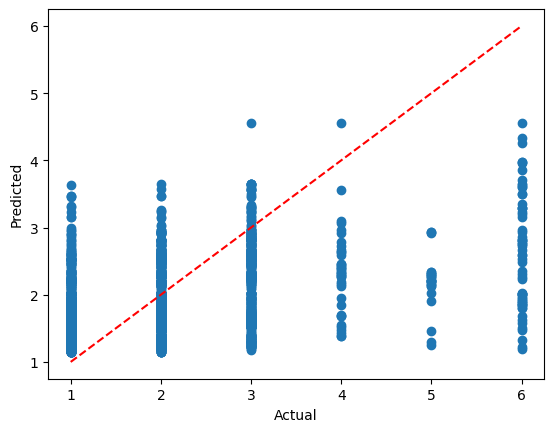

In [36]:
# Plot the predicted values vs. the actual values
y_pred = model.predict(X)

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**B. Binary Dependent Variable**

In [63]:
# Set the dependent variable
y = df_subset["RENEWSUPPORT_BINARY"]

In [75]:
# Set the independent variables
X = df_subset[["CLIMCONCERN_NET_1.0", "CLIMCONCERN_NET_2.0", "NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]

In [39]:
# Estimate the model
model = LinearRegression().fit(X, y)

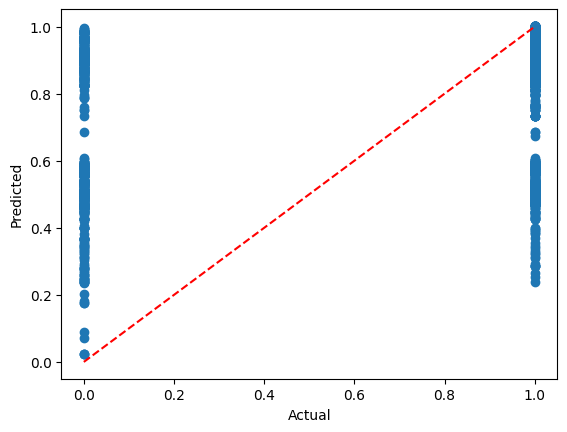

In [40]:
# Plot the predicted values vs. the actual values
y_pred = model.predict(X)

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [41]:
print(y_pred.min())
print(y_pred.max())

0.023101177579533644
1.0020667700255779


In [42]:
# If you want to evaluate the model performance like logistic regression
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the training data
y_pred_binary = (y_pred>=0.5).astype(int)

# Print the confusion matrix and classification report
print(confusion_matrix(y, y_pred_binary))
print("- - - - - - - - - - - - - - -")
print(classification_report(y, y_pred_binary))

[[ 151  422]
 [  91 3644]]
- - - - - - - - - - - - - - -
              precision    recall  f1-score   support

           0       0.62      0.26      0.37       573
           1       0.90      0.98      0.93      3735

    accuracy                           0.88      4308
   macro avg       0.76      0.62      0.65      4308
weighted avg       0.86      0.88      0.86      4308



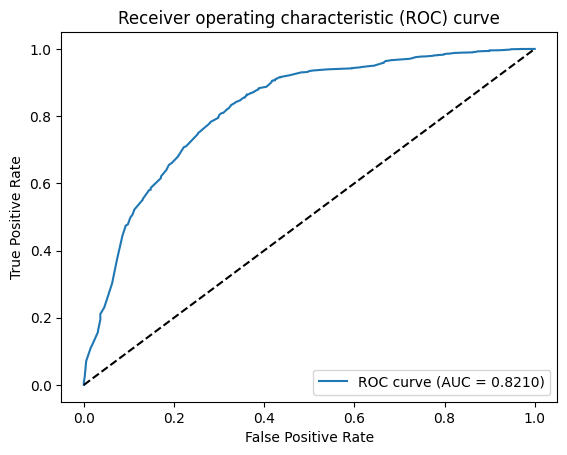

In [43]:
# Draw ROC curve
from sklearn import metrics

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
# Summarize the results better
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit() # Last year it worked...

# Print the summary table
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [78]:
# Explore data types
X.dtypes

,0
CLIMCONCERN_NET_1.0,bool
CLIMCONCERN_NET_2.0,bool
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


In [79]:
# Revise bool types to integer
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X.dtypes

<ipython-input-79-810be4882d19>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,0
CLIMCONCERN_NET_1.0,int64
CLIMCONCERN_NET_2.0,int64
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


In [80]:
# Try this code again!
# Summarize the results better
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit() # Last year it worked...

# Print the summary table
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     RENEWSUPPORT_BINARY   R-squared:                       0.239
Model:                             OLS   Adj. R-squared:                  0.238
Method:                  Least Squares   F-statistic:                     168.8
Date:                 Thu, 20 Feb 2025   Prob (F-statistic):          2.60e-248
Time:                         06:24:08   Log-Likelihood:                -871.74
No. Observations:                 4308   AIC:                             1761.
Df Residuals:                     4299   BIC:                             1819.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

In [81]:
# Summarize the results even better
print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.238    
Dependent Variable: RENEWSUPPORT_BINARY AIC:                1761.4897
Date:               2025-02-20 06:24    BIC:                1818.8038
No. Observations:   4308                Log-Likelihood:     -871.74  
Df Model:           8                   F-statistic:        168.8    
Df Residuals:       4299                Prob (F-statistic): 2.60e-248
R-squared:          0.239               Scale:              0.087942 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.2567   0.0418  6.1401 0.0000  0.1748  0.3387
CLIMCONCERN_NET_1.0    0.5835   0.0385 15.1589 0.0000  0.5081  0.6590
CLIMCONCERN_NET_2.0    0.1889   0.0399  4.7391 0.0000  0.1108  0.2671
NZKNOW_NET             0.0612   0.0076 

**1.2. Logistic Regression**

**Verbal Description**

>The logistic regression models the probability of an event taking place by estimating its log-odds as a linear function of independent variables.

**Mathematical Form**
>For observation $i \in \{1, ..., n\}$, we can express the relationship between $P(y_i=1)$ (hereafter, $P$) and $x_{1i}, x_{2i}, ..., x_{pi}$ as:
>
>$P = \frac{e^{\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}}}{1 + e^{\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}}} ⇔ ln(\frac{P}{1-P})=\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}$.
>
>where $\frac{P}{1-P}$ is the odds of $P$ and $ln(\frac{P}{1-P})$ is the logit function.


**What is the good of logistic regression?**

>In handling a binary dependent variable, the logistic regression provides an odds-based interpretation (i.e., odds are N times larger). When $p$ is sufficiently small, you can approximate it to N times larger probability. Also, the probability function ensures the predicted values do not go beyond the range (0, 1).
>
>![image](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)

**Why you can't model the logit function with linear regression?**
>You see the linear relationship between a logit function of $P(y_i)$ and covariates as:
>
>$logit(P) = ln(\frac{P}{1-P}) = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}$.
>
>But the thing is, you only observe whether an event occurred or not, instead of its probability. Since the observed values are either 0 or 1, the logit function cannot be defined (i.e., $ln(0)$ and $ln(\infty)$).

In this model, you will consider the following dependent/independent variables:

**Dependent Var.**
- RENEWSUPPORT_BINARY (binary)

**Independent Var.**
- CLIMATECONCERN_NET_* (multiple dummies)
- NZKNOW_NET
- NZKNOW_NET_MISS
- INTERNET
- INTERNET_MISS
- AGEBAND
- AGEBAND_MISS

In [82]:
# Import logistic regression from 'sklearn' library
from sklearn.linear_model import LogisticRegression

In [83]:
# Set the dependent variable
y = df_subset["RENEWSUPPORT_BINARY"]

In [84]:
# Set the independent variables
X = pd.concat([df_subset.filter(regex="CLIMATECONCERN_NET_*"), df_subset[["NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]], axis=1)

In [85]:
# Estimate the model
logit = LogisticRegression().fit(X, y)

In [86]:
# Evaluate the model performance on the training data
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the training data
y_pred = logit.predict(X)

# Print the confusion matrix and classification report
print(confusion_matrix(y, y_pred))
print("- - - - - - - - - - - - - - -")
print(classification_report(y, y_pred))

[[  10  563]
 [   4 3731]]
- - - - - - - - - - - - - - -
              precision    recall  f1-score   support

           0       0.71      0.02      0.03       573
           1       0.87      1.00      0.93      3735

    accuracy                           0.87      4308
   macro avg       0.79      0.51      0.48      4308
weighted avg       0.85      0.87      0.81      4308



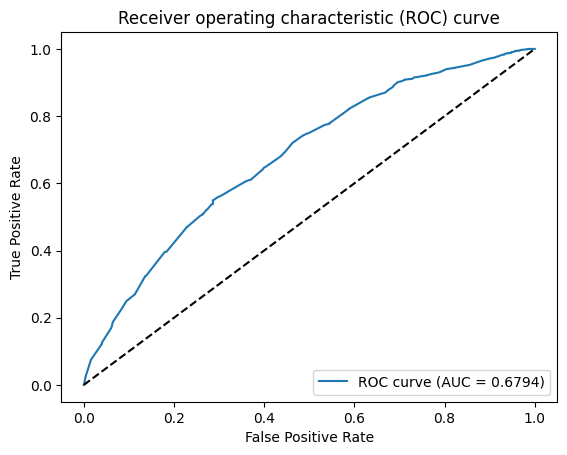

In [87]:
# Draw ROC curve
from sklearn import metrics

# Get predicted probabilities
y_pred_proba = logit.predict_proba(X)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [88]:
# Summarize the results
import statsmodels.api as sm

# Fit the logistic regression model
logit = sm.Logit(y, sm.add_constant(X)).fit()

# Print the summary table
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.366786
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     RENEWSUPPORT_BINARY   No. Observations:                 4308
Model:                           Logit   Df Residuals:                     4301
Method:                            MLE   Df Model:                            6
Date:                 Thu, 20 Feb 2025   Pseudo R-squ.:                 0.06448
Time:                         06:24:27   Log-Likelihood:                -1580.1
converged:                        True   LL-Null:                       -1689.0
Covariance Type:             nonrobust   LLR p-value:                 3.046e-44
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4646      0.201      2.307      0.021       0.070       0.859
NZKNOW

**1.3. Poisson Regression**

**Verbal Description**

>Poisson regression is a generalized linear model form of regression analysis used to model count data, which assumes that a dependent variable follows a Poisson distribution.

**Mathematical Form**

Poisson Distribution
>A discrete random variable X has the following probability mass function with parameter $\lambda > 0$:
>
>$P(X=k)=\frac{\lambda^k e^{-\lambda}}{k!}$
>
>where $k$ is the number of occurrences ($k=0,1,2,...)$.
>
>In the Poission distribution, $\lambda = E(X) = Var(X)$.

Regression
>For observation $i \in \{1, ..., n\}$, we can express the relationship between $P(y_i=1)$ (hereafter, $P$) and $x_{1i}, x_{2i}, ..., x_{pi}$ as:
>
>$ln(E(y_i| x_{1i}, x_{2i}, ..., x_{pi}))=\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}$.
>
>Define $\lambda \equiv E(y_i| x_{1i}, x_{2i}, ..., x_{pi}) = e^{\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}}$, then we can express the Poisson distribution's probability mass function as:
>
>$P(y|x_{1i}, x_{2i}, ..., x_{pi}; \beta_0, \beta_1, ..., \beta_p) = \frac{\lambda^y}{y!}e^{-\lambda}$.


**What is the good of Poisson regression?**

>In handling a count dependent variable, Poisson regression can be more appropriate than linear regression. It is well known to model the arrival of service requests effectively.

**What should we be cautious about Poisson regression?**
>Poisson regression may not provide plausible interpretations on continuous variables. Also, the equal mean and variance assumption is very strong, calling for more advanced approaches, such as negative binomial regression and zero-inflated Poisson regression.

In this model, you will consider the following dependent/independent variables:

**Dependent Var.**
- RENEWSUPPORT (continuous)
>We will consider `RENEWSUPPORT` (which has integer intervals) approximately similar to a count variable.

**Independent Var.**
- CLIMATECONCERN_NET_* (multiple dummies)
- NZKNOW_NET
- NZKNOW_NET_MISS
- INTERNET
- INTERNET_MISS
- AGEBAND
- AGEBAND_MISS

In [89]:
# Set the dependent variable
y = df_subset["RENEWSUPPORT"]
y

,RENEWSUPPORT
0,2
1,3
2,1
3,3
4,3
...,...
4376,2
4377,1
4378,3
4379,1


In [97]:
# Set the independent variables
X = df_subset[["CLIMCONCERN_NET_1.0", "CLIMCONCERN_NET_2.0", "NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]
X

,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,NZKNOW_NET,NZKNOW_NET_MISS,INTERNET,INTERNET_MISS,AGEBAND,AGEBAND_MISS
0,True,False,3.0,0,2.0,0,5.0,0
1,True,False,1.0,0,2.0,0,4.0,0
2,True,False,3.0,0,1.0,0,3.0,0
3,True,False,2.0,0,1.0,0,7.0,0
4,False,True,3.0,0,2.0,0,7.0,0
...,...,...,...,...,...,...,...,...
4376,True,False,1.0,0,4.0,0,6.0,0
4377,False,True,2.0,0,2.0,0,4.0,0
4378,False,True,2.0,0,1.0,0,3.0,0
4379,True,False,2.0,0,2.0,0,6.0,0


In [91]:
# Estimate the model (use 'statsmodels' package instead)
import statsmodels.api as sm

In [92]:
# Fit the Poisson regression model
poisson = sm.GLM(y, sm.add_constant(X), family=sm.families.Poisson()).fit() # Obtain an error

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [98]:
# Change the data format to numeric
y_numeric = pd.to_numeric(y)
y_numeric

,RENEWSUPPORT
0,2
1,3
2,1
3,3
4,3
...,...
4376,2
4377,1
4378,3
4379,1


In [ ]:
# Explore data types
X.dtypes

In [99]:
# Revise bool types to integer
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X.dtypes

<ipython-input-99-59b6305c9f6d>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,0
CLIMCONCERN_NET_1.0,int64
CLIMCONCERN_NET_2.0,int64
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


In [100]:
# Estimate the Poisson regression model again
poisson = sm.GLM(y_numeric, sm.add_constant(X), family=sm.families.Poisson()).fit() # Revise the data types again

In [101]:
# Summarize the results better
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RENEWSUPPORT   No. Observations:                 4308
Model:                            GLM   Df Residuals:                     4299
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5713.5
Date:                Thu, 20 Feb 2025   Deviance:                       1303.6
Time:                        06:27:16   Pearson chi2:                 1.50e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1154
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3244    

In [102]:
# Summarize the results even better
print(poisson.summary2())

                 Results: Generalized linear model
Model:               GLM               AIC:             11444.9556 
Link Function:       Log               BIC:             -34671.3885
Dependent Variable:  RENEWSUPPORT      Log-Likelihood:  -5713.5    
Date:                2025-02-20 06:27  LL-Null:         -5977.6    
No. Observations:    4308              Deviance:        1303.6     
Df Model:            8                 Pearson chi2:    1.50e+03   
Df Residuals:        4299              Scale:           1.0000     
Method:              IRLS                                          
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const                1.3244   0.0823 16.1004 0.0000  1.1632  1.4857
CLIMCONCERN_NET_1.0 -0.6322   0.0717 -8.8162 0.0000 -0.7728 -0.4917
CLIMCONCERN_NET_2.0 -0.1638   0.0742 -2.2086 0.0272 -0.3092 -0.01

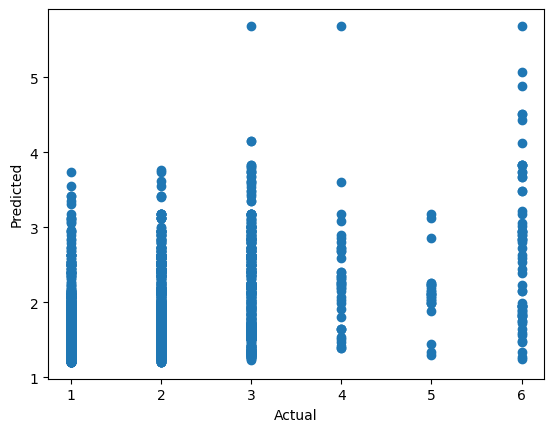

In [103]:
# Plot the predicted values vs. the actual values
X_train = sm.add_constant(X)
y_pred = poisson.predict(X_train)

plt.scatter(y_numeric, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### **Part 2. Advanced Models**

**2.1. Stepwise Regression**

**Verbal Description**
>Stepwise regression is a method of fitting a regression model by iteratively adding or removing variables. It is used to build a model that is accurate and parsimonious, meaning that it has the smallest number of variables that can explain the data.

**Implementation Process**
>There are two main types of stepwise regression:
>* Forward Selection –  In forward selection, the algorithm starts with an empty model and iteratively adds variables to the model until no further improvement is made.
>* Backward Elimination – In backward elimination, the algorithm starts with a model that includes all variables and iteratively removes variables until no further improvement is made.

**Additional Notes**
>Stepwise regression is a desirable approach for prediction, but you should be careful when you build a model for causal inference. Also, you might obtain different variable selections between forward, backward, and other options.

For simplicity, we will focus on the binary dependent variable only.

**Dependent Var.**
- RENEWSUPPORT_BINARY (binary)

**Independent Var.**
- CLIMATECONCERN_NET_* (multiple dummies)
- NZKNOW_NET
- NZKNOW_NET_MISS
- INTERNET
- INTERNET_MISS
- AGEBAND
- AGEBAND_MISS

In [104]:
# Set the dependent variable
y = df_subset["RENEWSUPPORT_BINARY"]
y

,RENEWSUPPORT_BINARY
0,1
1,0
2,1
3,0
4,0
...,...
4376,1
4377,1
4378,0
4379,1


In [105]:
# Set the independent variables
X = df_subset[["CLIMCONCERN_NET_1.0", "CLIMCONCERN_NET_2.0", "NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]
X

,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,NZKNOW_NET,NZKNOW_NET_MISS,INTERNET,INTERNET_MISS,AGEBAND,AGEBAND_MISS
0,True,False,3.0,0,2.0,0,5.0,0
1,True,False,1.0,0,2.0,0,4.0,0
2,True,False,3.0,0,1.0,0,3.0,0
3,True,False,2.0,0,1.0,0,7.0,0
4,False,True,3.0,0,2.0,0,7.0,0
...,...,...,...,...,...,...,...,...
4376,True,False,1.0,0,4.0,0,6.0,0
4377,False,True,2.0,0,2.0,0,4.0,0
4378,False,True,2.0,0,1.0,0,3.0,0
4379,True,False,2.0,0,2.0,0,6.0,0


In [108]:
# Explore data types
X.dtypes

,0
CLIMCONCERN_NET_1.0,bool
CLIMCONCERN_NET_2.0,bool
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


In [109]:
# Revise bool types to integer
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X.dtypes

<ipython-input-109-810be4882d19>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,0
CLIMCONCERN_NET_1.0,int64
CLIMCONCERN_NET_2.0,int64
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


**A. Coding with `statsmodels`**

In [106]:
import statsmodels.api as sm

# Define the stepwise regression function
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in  = 0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target variable
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    """
    included = list(initial_list)

    while True:
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # Use all coefficients except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # Null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.index[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [110]:
# Use the stepwise regression function to select the features
selected_features = stepwise_selection(X, y)

Add  CLIMCONCERN_NET_1.0            with p-value 3.75821e-222
Add  NZKNOW_NET                     with p-value 8.70757e-20
Add  INTERNET                       with p-value 9.18655e-09
Add  CLIMCONCERN_NET_2.0            with p-value 1.12025e-06
Add  AGEBAND_MISS                   with p-value 2.35342e-05


In [112]:
# Subset the dataframe with the selected features
X_selected = X[selected_features]
X_selected

,CLIMCONCERN_NET_1.0,NZKNOW_NET,INTERNET,CLIMCONCERN_NET_2.0,AGEBAND_MISS
0,1,3.0,2.0,0,0
1,1,1.0,2.0,0,0
2,1,3.0,1.0,0,0
3,1,2.0,1.0,0,0
4,0,3.0,2.0,1,0
...,...,...,...,...,...
4376,1,1.0,4.0,0,0
4377,0,2.0,2.0,1,0
4378,0,2.0,1.0,1,0
4379,1,2.0,2.0,0,0


In [113]:
# Estimate a linear regression model using the selected features
stepwise = sm.OLS(y, sm.add_constant(X_selected)).fit()

In [114]:
# Summarize the results
print(stepwise.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.237    
Dependent Variable: RENEWSUPPORT_BINARY AIC:                1761.4472
Date:               2025-02-20 06:29    BIC:                1799.6565
No. Observations:   4308                Log-Likelihood:     -874.72  
Df Model:           5                   F-statistic:        268.6    
Df Residuals:       4302                Prob (F-statistic): 1.30e-250
R-squared:          0.238               Scale:              0.088002 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.2416   0.0413  5.8531 0.0000  0.1607  0.3226
CLIMCONCERN_NET_1.0    0.5804   0.0384 15.1019 0.0000  0.5050  0.6557
NZKNOW_NET             0.0599   0.0074  8.0615 0.0000  0.0453  0.0744
INTERNET              -0.0202   0.0038 

In [115]:
# If you want to evaluate the model performance like logistic regression

# Generate predictions on the training data
y_pred = stepwise.predict(sm.add_constant(X_selected))
y_pred_binary = (y_pred>=0.5).astype(int)

# Print the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y, y_pred_binary))
print("- - - - - - - - - - - - - - -")
print(classification_report(y, y_pred_binary))

[[ 135  438]
 [  75 3660]]
- - - - - - - - - - - - - - -
              precision    recall  f1-score   support

           0       0.64      0.24      0.34       573
           1       0.89      0.98      0.93      3735

    accuracy                           0.88      4308
   macro avg       0.77      0.61      0.64      4308
weighted avg       0.86      0.88      0.86      4308



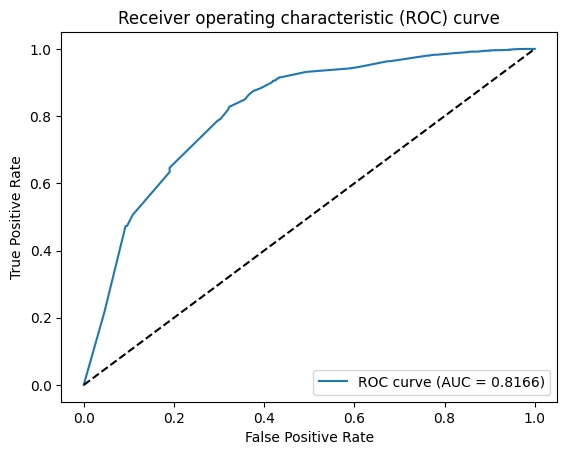

In [116]:
# Draw ROC curve
from sklearn import metrics

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

**B. Simple Command with `SequentialFeatureSelector`**

In [117]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Create the linear regression model
linear = LinearRegression()

# Create the forward stepwise feature selector
selector = SequentialFeatureSelector(linear, direction='forward', scoring='r2')

In [118]:
# Apply the feature selector to the data
selector.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), scoring='r2')

In [119]:
# Print the selected feature indices
print(selector.get_support(indices=True))

[0 1 2 4]


In [120]:
# Create a DataFrame using the selected variables
X_selected = X.iloc[:, [0, 1, 2, 4]]
X_selected

,CLIMCONCERN_NET_1.0,CLIMCONCERN_NET_2.0,NZKNOW_NET,INTERNET
0,1,0,3.0,2.0
1,1,0,1.0,2.0
2,1,0,3.0,1.0
3,1,0,2.0,1.0
4,0,1,3.0,2.0
...,...,...,...,...
4376,1,0,1.0,4.0
4377,0,1,2.0,2.0
4378,0,1,2.0,1.0
4379,1,0,2.0,2.0


In [121]:
# Change the data format to numeric
y_numeric = pd.to_numeric(y)
y_numeric

,RENEWSUPPORT_BINARY
0,1
1,0
2,1
3,0
4,0
...,...
4376,1
4377,1
4378,0
4379,1


In [122]:
# Summarize the results better
import statsmodels.api as sm

# Create a new model using only the selected features
model = sm.OLS(y_numeric, sm.add_constant(X_selected)).fit()

# Print the summary table
print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.234    
Dependent Variable: RENEWSUPPORT_BINARY AIC:                1777.3537
Date:               2025-02-20 06:29    BIC:                1809.1948
No. Observations:   4308                Log-Likelihood:     -883.68  
Df Model:           4                   F-statistic:        330.0    
Df Residuals:       4303                Prob (F-statistic): 5.03e-248
R-squared:          0.235               Scale:              0.088348 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.2288   0.0413  5.5459 0.0000  0.1479  0.3096
CLIMCONCERN_NET_1.0    0.5912   0.0384 15.3877 0.0000  0.5159  0.6665
CLIMCONCERN_NET_2.0    0.1942   0.0398  4.8762 0.0000  0.1161  0.2722
NZKNOW_NET             0.0602   0.0074 

In [123]:
# If you want to evaluate the model performance like logistic regression

# Generate predictions on the training data
y_pred = model.predict(sm.add_constant(X_selected))
y_pred_binary = (y_pred>=0.5).astype(int)

# Print the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y, y_pred_binary))
print("- - - - - - - - - - - - - - -")
print(classification_report(y, y_pred_binary))

[[ 127  446]
 [  72 3663]]
- - - - - - - - - - - - - - -
              precision    recall  f1-score   support

           0       0.64      0.22      0.33       573
           1       0.89      0.98      0.93      3735

    accuracy                           0.88      4308
   macro avg       0.76      0.60      0.63      4308
weighted avg       0.86      0.88      0.85      4308



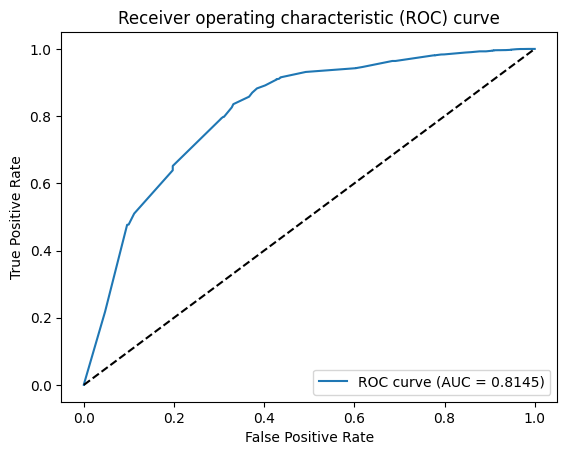

In [124]:
# Draw ROC curve
from sklearn import metrics

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

**2.2. Multinomial Logistic Regression**

**Verbal Description**
>Multinomial logistic regression is used to model nominal outcome variables, in which the log odds of the outcomes are modeled as a linear combination of the predictor variables.

**Mathematical Form**

Let me remind that binomial logistic regression was described as follows:
>For observation $i \in \{1, ..., n\}$, we can express the relationship between $P(y_i=1)$ (hereafter, $P$) and $x_{1i}, x_{2i}, ..., x_{pi}$ as:
>
>$P = \frac{e^{\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}}}{1 + e^{\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}}} ⇔ ln(\frac{P}{1-P})=\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}$.
>
>where $\frac{P}{1-P}$ is the odds of $P$ and $ln(\frac{P}{1-P})$ is the logit function.

For multinomial logistic regression, all you need to do is to consider the probabilities of other categories like this:
>$ln\frac{P(y_i=1)}{P(y_i=K)} = \boldsymbol{X_i}\boldsymbol{\beta_1}$.
>
>$ln\frac{P(y_i=2)}{P(y_i=K)} = \boldsymbol{X_i}\boldsymbol{\beta_2}$.
>
>$\vdots$
>
>$ln\frac{P(y_i=K-1)}{P(y_i=K)} = \boldsymbol{X_i}\boldsymbol{\beta_{K-1}}$

In other words, you consider the event $y_i=K$ the baseline and quantify how much the covariates $\boldsymbol{X_i}$ increases the logit $P(y_i=k)$. We can express this equation as follows:
>$P(Y_i=k) = \frac{e^{\boldsymbol{X_i}\boldsymbol{\beta_k}}}{1+\Sigma_{j=1}^{K-1}e^{\boldsymbol{X_i}\boldsymbol{\beta_j}}}$.


**Dependent Var.**
- MOSTWORRY (categorical variable)
>* 1: Energy bills (gas/electricity)
>* 2: Food and other household essentials
>* 3: Transport, including petrol/diesel and public transport costs
>* 4: Not applicable – not worried about any of them
>* 5: Not applicable – same level of worry for all of them
>* 6: Not applicable/Don't know
>* 7: Prefer not to say
>* -4 (missing value): Not answered (Paper)
>* -5 (missing value): Multiple options chosen (Paper)

**Independent Var.**
- CLIMATECONCERN_NET_* (multiple dummies)
- NZKNOW_NET
- NZKNOW_NET_MISS
- INTERNET
- INTERNET_MISS
- AGEBAND
- AGEBAND_MISS

In [125]:
# (Added on Feb 15, 2024) Explore unique values of the dependent variable
print(df_subset["MOSTWORRY"].unique())

[3 1 5 4 2 6 7]


In [126]:
# (Added on Feb 15, 2024) Revise the variable values
df_subset["MOSTWORRY"] = df_subset["MOSTWORRY"].replace([4, 5, 6, 7], 0)
print(df_subset["MOSTWORRY"].unique())

[3 1 0 2]


<ipython-input-126-5027f2d2abb3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset["MOSTWORRY"] = df_subset["MOSTWORRY"].replace([4, 5, 6, 7], 0)


In [127]:
# Set the dependent variable
y = df_subset["MOSTWORRY"]
y

,MOSTWORRY
0,3
1,1
2,1
3,1
4,3
...,...
4376,0
4377,1
4378,0
4379,3


In [128]:
# Set the independent variables
X = pd.concat([df_subset.filter(regex="CLIMATECONCERN_NET_*"), df_subset[["NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]], axis=1)
X

,NZKNOW_NET,NZKNOW_NET_MISS,INTERNET,INTERNET_MISS,AGEBAND,AGEBAND_MISS
0,3.0,0,2.0,0,5.0,0
1,1.0,0,2.0,0,4.0,0
2,3.0,0,1.0,0,3.0,0
3,2.0,0,1.0,0,7.0,0
4,3.0,0,2.0,0,7.0,0
...,...,...,...,...,...,...
4376,1.0,0,4.0,0,6.0,0
4377,2.0,0,2.0,0,4.0,0
4378,2.0,0,1.0,0,3.0,0
4379,2.0,0,2.0,0,6.0,0


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 'y' needs to be encoded
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Fit the multinomial logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X, y_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [130]:
# Predict the target values for the test set
y_pred = logreg.predict(X)

In [131]:
# Print the classification report
print(classification_report(y_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.01      0.02       953
           1       0.60      1.00      0.75      2555
           2       0.00      0.00      0.00       286
           3       0.00      0.00      0.00       514

    accuracy                           0.59      4308
   macro avg       0.26      0.25      0.19      4308
weighted avg       0.45      0.59      0.45      4308



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**2.3. Negative Binomial Regression**

**Verbal Description**
> Negative binomial regression is for modeling count variables, usually for over-dispersed count outcome variables. Specifically, when the mean of the count is lesser than the variance of the count, then Negative binomial regression is used to test for connections between confounding and predictor variables on a count outcome variable.

**Mathematical Form**
>The probability mass function of the negative binomial distribution is as follows:
>
>$f(k; r, p) \equiv P(X=k) = \binom{k+r-1}{k} (1-p)^k p^r$,
>
>and its mean and variance are obtained as $\frac{r(1-p)}{p}$ and $\frac{r(1-p)}{p^2}$, respectively.
>
>Given that $p<1$ and $\frac{r(1-p)}{p} < \frac{r(1-p)}{p^2}$, this model can address the over-dispersion problem of Poisson regression.

**Pros and Cons**

>Negative binomial regression is a popular generalization of Poisson regression because it loosens the highly restrictive assumption that the variance is equal to the mean made by the Poisson model. But it can perform worse if the assumption of Poisson regression is satisfied, due to additional parameters.

In this model, you will consider the following dependent/independent variables:

**Dependent Var.**
- RENEWSUPPORT (continuous)
>We will consider `RENEWSUPPORT` (which has integer intervals) approximately similar to a count variable.

**Independent Var.**
- CLIMATECONCERN_NET_* (multiple dummies)
- NZKNOW_NET
- NZKNOW_NET_MISS
- INTERNET
- INTERNET_MISS
- AGEBAND
- AGEBAND_MISS

In [132]:
# Set the dependent variable
y = df_subset["RENEWSUPPORT"]

In [133]:
# Change the data format to numeric
y_numeric = pd.to_numeric(y)
y_numeric

,RENEWSUPPORT
0,2
1,3
2,1
3,3
4,3
...,...
4376,2
4377,1
4378,3
4379,1


In [134]:
# Set the independent variables
X = pd.concat([df_subset.filter(regex="CLIMATECONCERN_NET_*"), df_subset[["NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]], axis=1)

In [135]:
import statsmodels.api as sm

# Fit the negative binomial regression model
nb_reg = sm.GLM(y_numeric, sm.add_constant(X), family=sm.families.NegativeBinomial()).fit()

# Print the model summary
print(nb_reg.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            15103.0148 
Link Function:      Log              BIC:            -35447.7874
Dependent Variable: RENEWSUPPORT     Log-Likelihood: -7544.5    
Date:               2025-02-20 06:29 LL-Null:        -7591.6    
No. Observations:   4308             Deviance:       543.97     
Df Model:           6                Pearson chi2:   691.       
Df Residuals:       4301             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const             0.9238   0.0929  9.9456 0.0000  0.7418  1.1059
NZKNOW_NET       -0.2518   0.0312 -8.0607 0.0000 -0.3131 -0.1906
NZKNOW_NET_MISS  -0.4749   0.8678 -0.5472 0.5842 -2.1758  1.2260
INTERNET          0.0419   0.0184  2.2827

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


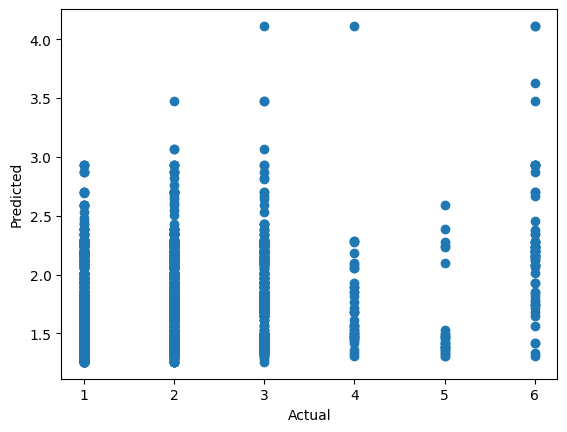

In [136]:
# Plot the predicted values vs. the actual values
X_train = sm.add_constant(X)
y_pred = nb_reg.predict(sm.add_constant(X_train))

plt.scatter(y_numeric, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### **Part 3. Data Partition and Evaluation**

**3.1. Data Partition and Cross-validation**

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a **test set** `X_test`, `y_test`.

Note that the word "experiment" is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

<div>
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500"/>
</div>

**Reference:**
* [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

```Python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation, `next(ShuffleSplit().split(X, y))`, and application to input data into a single call for splitting (and optionally subsampling) data into a one-liner.


**Parameters:**

***`arrays`: sequence of indexables with same length / shape[0]**
>Allowed inputs are lists, `numpy` arrays, `scipy-sparse` matrices or `pandas` dataframes.

**`test_size`: float or int, default=None**
>If `float`, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If `int`, represents the absolute number of test samples. If `None`, the value is set to the complement of the `train size`. If `train_size` is also `None`, it will be set to 0.25.

**`train_size`: float or int, default=None**
>If `float`, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If `int`, represents the absolute number of train samples. If `None`, the value is automatically set to the complement of the test size.

**`random_state`: int, RandomState instance or None, default=None**
>Controls the shuffling applied to the data before applying the split. Pass an `int` for reproducible output across multiple function calls.

**`shuffle`: bool, default=True**
>Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

**`stratify`: array-like, default=None**
>If not None, data is split in a stratified fashion, using this as the class labels.

**Returns:**

**`splitting`: list, length=2 * len(arrays)**
>List containing train-test split of inputs.

In [137]:
# Sample a training set while holding out 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [138]:
# Check the matrix shapes
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (3446, 6) (3446,)
Test set: (862, 6) (862,)


In [139]:
# Explore the DataFrames
X_train

,NZKNOW_NET,NZKNOW_NET_MISS,INTERNET,INTERNET_MISS,AGEBAND,AGEBAND_MISS
2630,2.0,0,2.0,0,8.0,0
1202,2.0,0,1.0,0,0.0,1
2860,3.0,0,4.0,0,7.0,0
2644,2.0,0,1.0,0,3.0,0
1335,2.0,0,1.0,0,3.0,0
...,...,...,...,...,...,...
1617,3.0,0,1.0,0,3.0,0
4130,2.0,0,6.0,0,8.0,0
1367,2.0,0,2.0,0,4.0,0
3513,3.0,0,1.0,0,8.0,0


In [140]:
y_train

,RENEWSUPPORT
2630,2
1202,1
2860,2
2644,3
1335,1
...,...
1617,1
4130,2
1367,2
3513,1


In [141]:
X_test

,NZKNOW_NET,NZKNOW_NET_MISS,INTERNET,INTERNET_MISS,AGEBAND,AGEBAND_MISS
851,2.0,0,2.0,0,7.0,0
2447,3.0,0,2.0,0,3.0,0
573,3.0,0,1.0,0,3.0,0
549,3.0,0,1.0,0,7.0,0
1593,2.0,0,1.0,0,6.0,0
...,...,...,...,...,...,...
307,2.0,0,2.0,0,8.0,0
520,2.0,0,2.0,0,8.0,0
3990,3.0,0,1.0,0,4.0,0
45,3.0,0,2.0,0,5.0,0


In [142]:
y_test

,RENEWSUPPORT
851,2
2447,5
573,1
549,2
1593,1
...,...
307,3
520,3
3990,1
45,1


**3.2. Accuracy Metrics and Cross-validation**

**A. Binary Outcomes**

In considering binary outcomes, we often rely on a confusion matrix to evaluate the model's performance. A **confusion matrix** is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

**Basic metrics of confusion matrix:**
* **True Positives (TP):** when the actual value is Positive and predicted is also Positive.
* **True negatives (TN):** when the actual value is Negative and prediction is also Negative.
* **False positives (FP):** When the actual is negative but prediction is Positive. Also known as the Type 1 error
* **False negatives (FN):** When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

<div>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*jMs1RmSwnYgR9CsBw-z1dw.png" width="600"/>
</div>

Some straightforward facts:
1. A **good model** is one which has **high TP and TN rates**, while **low FP and FN rates**.
1. If you have an **imbalanced dataset** to work with, it’s always better to use **confusion matrix** as your evaluation criteria for your machine learning model.

**Classification measures:**
* **Accuracy** ($=\frac{TP + TN}{P + N}$)
>Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions. The accuracy metric is not suited for imbalanced classes.
* **Precision** ($=\frac{TP}{PP}$)
>It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.
* **Recall** ($=\frac{TP}{P}$)
>It is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive. It is also known as sensitivity. Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.
* **F1-Score** ($=2 \frac{Precision \times Recall}{Precision + Recall}$)
>The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall. We use harmonic mean because it is not sensitive to extremely large values, unlike simple averages.
>
>F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

**References:**
* [Confusion Matrix (Wikipedia)](https://en.wikipedia.org/wiki/Confusion_matrix)
* [What is a confusion matrix?](https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5)
* [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


```Python
sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```
Compute confusion matrix to evaluate the accuracy of a classification. In binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.

**Parameters:**

**y_true: array-like of shape (n_samples,)**
>Ground truth (correct) target values.

**y_pred: array-like of shape (n_samples,)**
>Estimated targets as returned by a classifier.

**labels: array-like of shape (n_classes), default=None**
>List of labels to index the matrix. This may be used to reorder or select a subset of labels. If `None` is given, those that appear at least once in `y_true` or `y_pred` are used in sorted order.

**sample_weight: array-like of shape (n_samples,), default=None**
>Sample weights.

**normalize: {‘true’, ‘pred’, ‘all’}, default=None**
>Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If `None`, confusion matrix will not be normalized.

**Returns:**

**C: ndarray of shape (n_classes, n_classes)**
>Confusion matrix whose *i*-th row and *j*-th column entry indicates the number of samples with true label being *i*-th class and predicted label being *j*-th class.

In [143]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [144]:
# Set Y variable (take a binary variable here)
y = df_subset["RENEWSUPPORT_BINARY"]

# Set X variables
X = pd.concat([df_subset.filter(regex="CLIMCONCERN_NET_*"), df_subset[["NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]], axis=1)
X = X.drop(["CLIMCONCERN_NET", "CLIMCONCERN_NET_1.0"], axis=1) # To avoid perfect multicollinearity

# Sample a training set while holding out 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [145]:
X_train.head()

,CLIMCONCERN_NET_2.0,CLIMCONCERN_NET_3.0,CLIMCONCERN_NET_MISS,NZKNOW_NET,NZKNOW_NET_MISS,INTERNET,INTERNET_MISS,AGEBAND,AGEBAND_MISS
2630,False,False,0,2.0,0,2.0,0,8.0,0
1202,False,False,0,2.0,0,1.0,0,0.0,1
2860,False,False,0,3.0,0,4.0,0,7.0,0
2644,True,False,0,2.0,0,1.0,0,3.0,0
1335,False,False,0,2.0,0,1.0,0,3.0,0


In [146]:
y_train.head()

,RENEWSUPPORT_BINARY
2630,1
1202,1
2860,1
2644,0
1335,1


In [147]:
# Estimate the model on the train set
logit = LogisticRegression().fit(X_train, y_train)

In [148]:
# Generate predictions on the train set
y_train_pred = logit.predict(X_train)

# Generate predictions on the test set
y_test_pred = logit.predict(X_test)

In [149]:
# See the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Print the results for the train set
print("-----Train Set-----")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------")
print(classification_report(y_train, y_train_pred))
print("\n")

# Print the results for the test set
print("-----Test Set-----")
print(confusion_matrix(y_test, y_test_pred))
print("------------------")
print(classification_report(y_test, y_test_pred))

-----Train Set-----
[[ 150  317]
 [  99 2880]]
-------------------
              precision    recall  f1-score   support

           0       0.60      0.32      0.42       467
           1       0.90      0.97      0.93      2979

    accuracy                           0.88      3446
   macro avg       0.75      0.64      0.68      3446
weighted avg       0.86      0.88      0.86      3446



-----Test Set-----
[[ 37  69]
 [ 29 727]]
------------------
              precision    recall  f1-score   support

           0       0.56      0.35      0.43       106
           1       0.91      0.96      0.94       756

    accuracy                           0.89       862
   macro avg       0.74      0.66      0.68       862
weighted avg       0.87      0.89      0.87       862



**B. Continuous Outcomes**

* **R-squared score, the coefficient of determination**
>R-squared (or $R^2$) represents the proportion of variance (of $y$) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
>
>Formally, the estimated $R^2$ is defined as:
>
>$R^2(y,\hat{y})=1 - \frac{\Sigma_{i=1}^n(y_i-\hat{y}_i)^2}{\Sigma_{i=1}^n(y_i-\bar{y})^2}$
>
>where $\bar{y}=\frac{1}{n}\Sigma_{i=1}^n y_i$ and $\Sigma_{i=1}^n(y_i-\hat{y}_i)^2=\Sigma_{i=1}^n \varepsilon_i^2$.

* **Mean squared error (MSE)**
>Mean squared error (MSE) is a risk metric corresponding to the expected value of the squared (quadratic) error or loss. It is formally defined as:
>
>$MAE(y,\hat{y}) = \frac{\Sigma_{i=1}^n (y_i-\hat{y}_i)^2 }{n}$.

* **Mean absolute error (MAE)**
> Mean absolute error (MAE) is a risk metric corresponding to the expected value of the absolute error loss. It is formally defined as:
>
>$MAE(y,\hat{y}) = \frac{\Sigma_{i=1}^n | y_i-\hat{y}_i | }{n} = \frac{\Sigma_{i=1}^n | \varepsilon_i | }{n}$.

* **Akaike information criterion (AIC)**
>The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.
>
>Let $k$ be the number of estimated parameters in the model and $\hat{L}$ be the maximized value of the likelihood function for the model. Then the AIC value of the model is the following:
>
>$AIC = 2k - 2 ln(\hat{L})$.
>
>Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value.

* **Bayesian information criterion (BIC)**
>The Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred.
>
>The BIC is formally defined as:
>
>$BIC = kln(n) - 2 ln(\hat{L})$,
>
>where $n$ is the number of observations; the other notations are identically defined as the AIC's formula.
>
>The formula for BIC is similar to the formula for AIC, but with a different penalty for the number of parameters. With AIC the penalty is $2k$, whereas with BIC the penalty is $kln(n)$.

**References:**
* [Regression metrics (scikit-learn)](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* [Akaike information criterion (Wikipedia)](https://en.wikipedia.org/wiki/Akaike_information_criterion)
* [Bayesian information criterion (Wikipedia)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

In [150]:
# Drop missing values
df_subset_nomissing = df_subset.dropna()  # statsmodels.api is sensitive to missing values

# Set Y variable (take a continuous variable here)
y = df_subset_nomissing["RENEWSUPPORT"]
y = pd.to_numeric(y) # statsmodels.api is sensitive to number types

# Set X variables
X = pd.concat([df_subset_nomissing.filter(regex="CLIMCONCERN_NET_*"), df_subset_nomissing[["NZKNOW_NET","NZKNOW_NET_MISS","INTERNET","INTERNET_MISS","AGEBAND","AGEBAND_MISS"]]], axis=1)
X = X.drop(["CLIMCONCERN_NET", "CLIMCONCERN_NET_1.0"], axis=1) # To avoid perfect multicollinearity

# Sample a training set while holding out 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [154]:
# Revise bool types to integer
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_train.dtypes

<ipython-input-154-7821d6d5bd31>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,0
CLIMCONCERN_NET_2.0,int64
CLIMCONCERN_NET_3.0,int64
CLIMCONCERN_NET_MISS,int64
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


In [155]:
# Revise bool types to integer
X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_test.dtypes

<ipython-input-155-f46a5b72abd6>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,0
CLIMCONCERN_NET_2.0,int64
CLIMCONCERN_NET_3.0,int64
CLIMCONCERN_NET_MISS,int64
NZKNOW_NET,float64
NZKNOW_NET_MISS,int64
INTERNET,float64
INTERNET_MISS,int64
AGEBAND,float64
AGEBAND_MISS,int64


In [156]:
# Linear Regression
import statsmodels.api as sm

# Fit the linear regression model
linear = sm.OLS(y_train, sm.add_constant(X_train), missing='drop').fit() # statsmodels.api is sensitive to missing values

# Print the summary table
print(linear.summary())

                            OLS Regression Results                            
Dep. Variable:           RENEWSUPPORT   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     151.0
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          2.48e-218
Time:                        06:37:09   Log-Likelihood:                -4102.7
No. Observations:                3446   AIC:                             8223.
Df Residuals:                    3437   BIC:                             8279.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0212 

In [157]:
# Generate predictions on the train and test sets
y_train_pred = linear.predict(sm.add_constant(X_train))
y_test_pred = linear.predict(sm.add_constant(X_test))

In [158]:
# Mean squared errors
import statsmodels

print("MSE (Train): ", statsmodels.tools.eval_measures.mse(y_train_pred, y_train, axis=0))
print("MSE (Test): ", statsmodels.tools.eval_measures.mse(y_test_pred, y_test, axis=0))

statsmodels.tools.eval_measures.mse(y_train_pred, y_train, axis=0)

MSE (Train):  0.6333349255461148
MSE (Test):  0.6006377302240877


0.6333349255461148

In [159]:
# Mean absolute errors
import statsmodels

print("MAE (Train): ", statsmodels.tools.eval_measures.meanabs(y_train_pred, y_train, axis=0))
print("MAE (Test): ", statsmodels.tools.eval_measures.meanabs(y_test_pred, y_test, axis=0))

MAE (Train):  0.5852562928844752
MAE (Test):  0.5681774337098526


In [160]:
# Stepwise Regression
import statsmodels.api as sm

# Define the stepwise regression function
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in  = 0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target variable
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    """
    included = list(initial_list)

    while True:
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # Use all coefficients except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # Null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.index[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [161]:
# Use the stepwise regression function to select the features
selected_features = stepwise_selection(X_train, y_train)

Add  CLIMCONCERN_NET_2.0            with p-value 9.51705e-110
Add  CLIMCONCERN_NET_3.0            with p-value 6.56825e-57
Add  NZKNOW_NET                     with p-value 9.67196e-44
Add  INTERNET                       with p-value 4.96026e-15
Add  AGEBAND_MISS                   with p-value 4.20313e-06
Add  AGEBAND                        with p-value 0.00151627


In [162]:
# Subset the dataframe with the selected features
X_selected = X[selected_features]

In [163]:
# Sample a training set while holding out 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=123)

In [164]:
# Estimate a linear regression model using the selected features
stepwise = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [165]:
# Summarize the results
print(stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:           RENEWSUPPORT   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     200.6
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          8.25e-220
Time:                        06:37:23   Log-Likelihood:                -4104.6
No. Observations:                3446   AIC:                             8223.
Df Residuals:                    3439   BIC:                             8266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0161    

In [166]:
# Generate predictions on the train and test sets
y_train_pred = stepwise.predict(sm.add_constant(X_train))
y_test_pred = stepwise.predict(sm.add_constant(X_test))

In [167]:
# Mean squared errors
import statsmodels

print("MSE (Train): ", statsmodels.tools.eval_measures.mse(y_train_pred, y_train, axis=0))
print("MSE (Test): ", statsmodels.tools.eval_measures.mse(y_test_pred, y_test, axis=0))

MSE (Train):  0.6340389278019624
MSE (Test):  0.5961911497757442


In [168]:
# Mean absolute errors
import statsmodels

print("MAE (Train): ", statsmodels.tools.eval_measures.meanabs(y_train_pred, y_train, axis=0))
print("MAE (Test): ", statsmodels.tools.eval_measures.meanabs(y_test_pred, y_test, axis=0))

MAE (Train):  0.5860279518394212
MAE (Test):  0.5668695897310849
